# 주가 데이터 시각화 참고

In [1]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [2]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.66'

In [3]:
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,75700,1,1000,1.34,75900,76000,75000,6649659,502459177000,451912539035000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,143800,1,2500,1.77,145200,145400,143300,1346541,194400740100,104686740087000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,373500,2,-10000,-2.61,383500,387000,371500,67387,25441537000,87399000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,776000,1,6000,0.78,775000,779000,771000,16712,12941685000,55231024000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,60700,1,400,0.66,61000,61900,60500,421231,25752124800,49949222690000,822886700,STK


In [4]:
# 삼성 코드로 2023년 주가 데이터 확인
df = fdr.DataReader('005930', '20230101', '20231231')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-02,55500,56100,55200,55500,10031448,0.003617
2023-01-03,55400,56000,54500,55400,13547030,-0.001802
2023-01-04,55700,58000,55600,57800,20188071,0.043321
2023-01-05,58200,58800,57600,58200,15682826,0.006920
2023-01-06,58300,59400,57900,59000,17334989,0.013746
...,...,...,...,...,...,...
2023-12-21,74600,75000,74300,75000,13478766,0.002674
2023-12-22,75800,76300,75400,75900,14515608,0.012000
2023-12-26,76100,76700,75700,76600,13164909,0.009223


<Axes: xlabel='Date'>

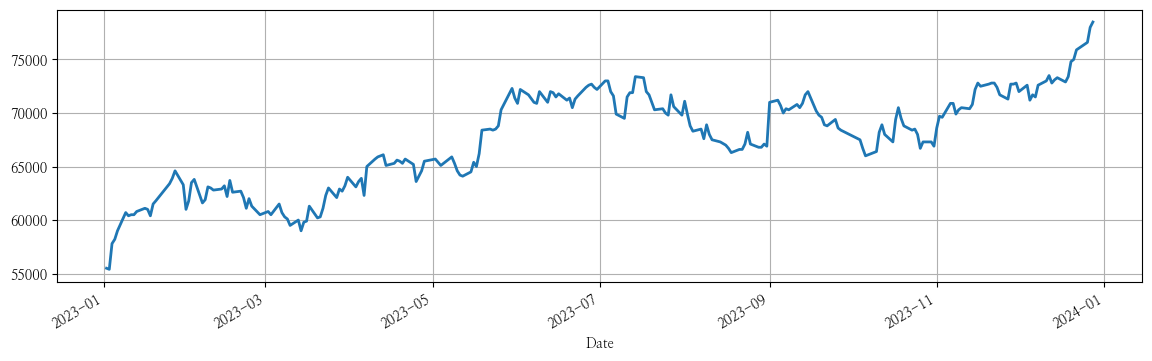

In [5]:
# 종가 데이터 시각화
df['Close'].plot()

In [6]:
# 이전 행과 현재 행 비교(증감 추이 분석)
df['Close'].diff() 

Date
2023-01-02       NaN
2023-01-03    -100.0
2023-01-04    2400.0
2023-01-05     400.0
2023-01-06     800.0
               ...  
2023-12-21     200.0
2023-12-22     900.0
2023-12-26     700.0
2023-12-27    1400.0
2023-12-28     500.0
Name: Close, Length: 245, dtype: float64

In [7]:
# 증감 추이 비율로 분석(*100하면 백분율)
df_daily = df['Close'].pct_change()
df_daily

Date
2023-01-02         NaN
2023-01-03   -0.001802
2023-01-04    0.043321
2023-01-05    0.006920
2023-01-06    0.013746
                ...   
2023-12-21    0.002674
2023-12-22    0.012000
2023-12-26    0.009223
2023-12-27    0.018277
2023-12-28    0.006410
Name: Close, Length: 245, dtype: float64

In [8]:
# 전날에 비해 종가가 감소한 날 count
a1 = df_daily < 0
a1.sum()

111

In [9]:
# 주식 시장 열린 날
len(df)

245

In [10]:
df_close = df["Close"] # 종가만 추출
df_des = df_close.describe(percentiles=(0.1, 0.9)) # 종가 금액의 기술통계량 정보(10%, 90% 백분위수 포함)

df_des

count      245.000000
mean     67457.142857
std       4521.687267
min      55400.000000
10%      60880.000000
50%      68300.000000
90%      72660.000000
max      78500.000000
Name: Close, dtype: float64

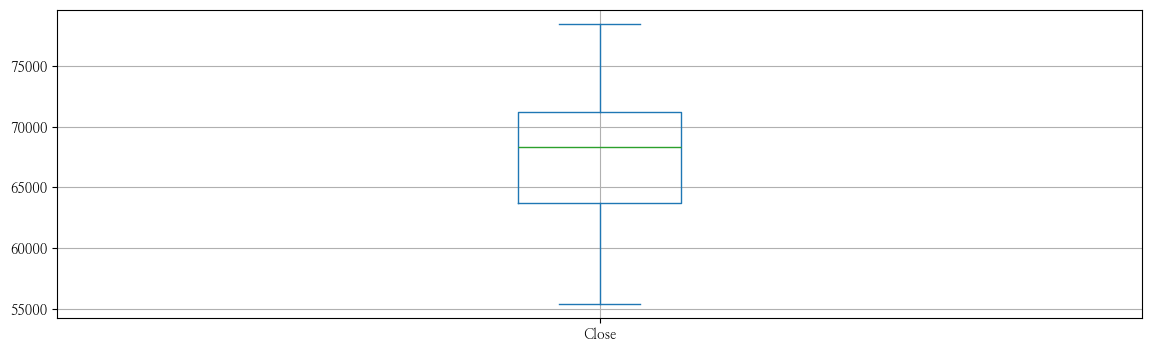

In [11]:
# box plot으로 이상치 확인
df_close.plot.box()
plt.show()

In [12]:
a1 = df_des.loc["10%"] # 10% 위치 값

a2 = df_close <= a1 # 10%이하의 값들

a3 = df_des.loc["90%"] # 90% 위치 값

a4 = df_close >= a3 # 90% 이하의 값들

# 10% 이하이거나 90% 이상인 값
a5 = a2 | a4

# 10% 이하, 90% 이상의 값들을 가져온다.
df_top_bottom = df_close[a5]

df_top_bottom

Date
2023-01-02    55500
2023-01-03    55400
2023-01-04    57800
2023-01-05    58200
2023-01-06    59000
2023-01-09    60700
2023-01-10    60400
2023-01-11    60500
2023-01-12    60500
2023-01-13    60800
2023-01-18    60400
2023-02-27    60500
2023-02-28    60600
2023-03-02    60800
2023-03-03    60500
2023-03-07    60700
2023-03-08    60300
2023-03-09    60100
2023-03-10    59500
2023-03-13    60000
2023-03-14    59000
2023-03-15    59800
2023-03-16    59900
2023-03-20    60200
2023-03-21    60300
2023-06-28    72700
2023-07-03    73000
2023-07-04    73000
2023-07-14    73400
2023-07-17    73300
2023-11-16    72800
2023-11-20    72700
2023-11-21    72800
2023-11-22    72800
2023-11-28    72700
2023-11-29    72700
2023-11-30    72800
2023-12-11    73000
2023-12-12    73500
2023-12-13    72800
2023-12-14    73100
2023-12-15    73300
2023-12-18    72900
2023-12-19    73400
2023-12-20    74800
2023-12-21    75000
2023-12-22    75900
2023-12-26    76600
2023-12-27    78000
2023-12-28    7

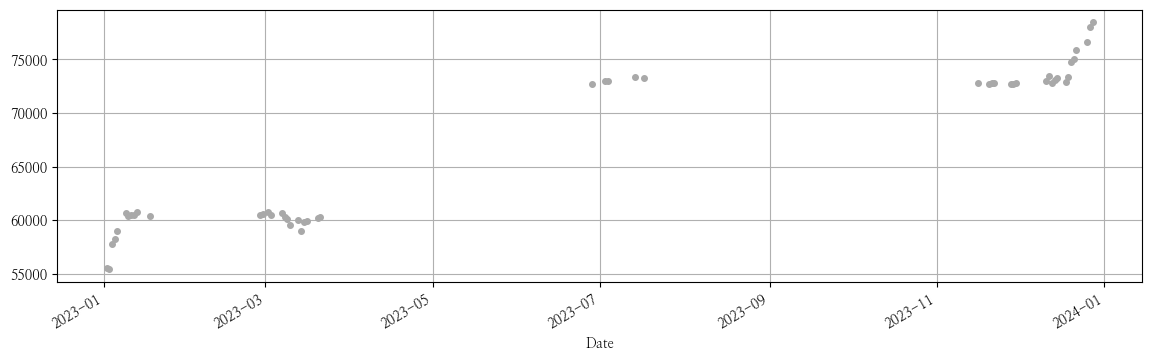

In [13]:
# 10% 이하이거나 90% 이상에 해당하는 값 시각화
df_top_bottom.plot(style=' ', marker='o', ms=4, color='darkgray')
plt.show()

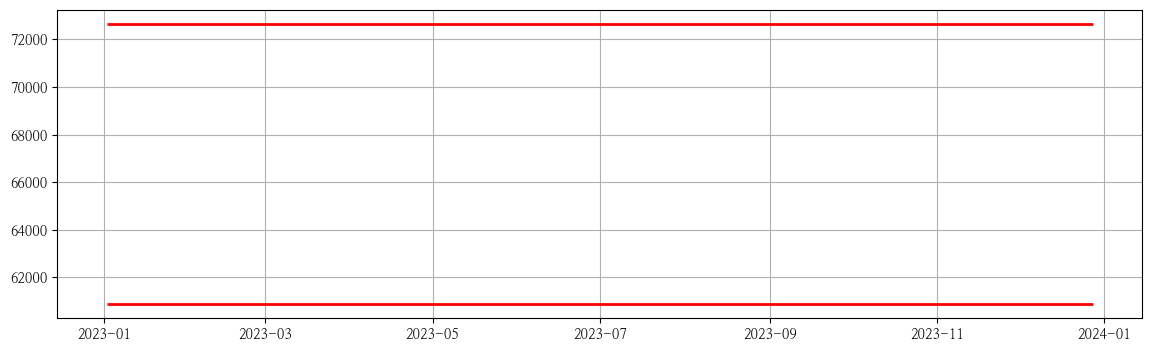

In [14]:
#
a1 = df_close <= df_des.loc["10%"] # 10% 이하의 값들
a2 = df_close >= df_des.loc['90%'] # 90% 이상의 값들
criteria = a1 | a2

value_10 = df_des.loc["10%"] # 10% 위치값
value_90 = df_des.loc["90%"] # 90% 위치값
index_min = criteria.index[0] # 제일 작은 날짜값(10% 이하 또는 90% 이상 값들 중 처음으로 True인 인덱스)
index_max = criteria.index[-1] # 제일 큰 날짜값(10% 이하 또는 90% 이상 값들 중 마지막으로 True인 인덱스)

plt.hlines(y = [value_10, value_90], xmin=index_min, xmax = index_max, color="red") # 10%, 90% 백분위수에 해당하는 가로선(hlines) 그리기
plt.show()

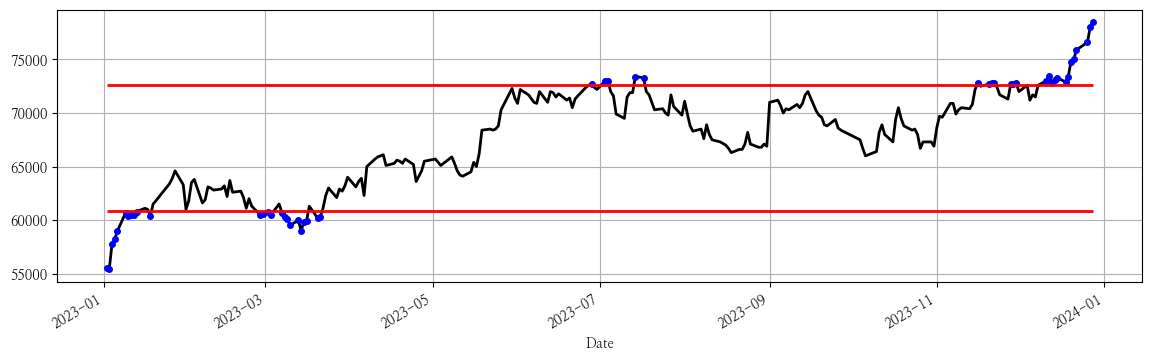

In [15]:
# 종가 전체 그래프
df_close.plot(color="black")

# 상위 90% 이상, 하위 10% 이하에 점을 찍는다.
df_top_bottom.plot(style = " ", marker = "o", ms = 4, color = "blue")

# 상위 90% 위치, 하위 10% 위치에 강조선을 긋는다.
plt.hlines(y = [value_10, value_90], xmin = index_min, xmax = index_max, color="red")
plt.show()

In [16]:
import pandas as pd
import cufflinks as cf
import numpy as np
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()

In [17]:
# 삼성 코드로 1년치 데이터 가져오기
single_stock = fdr.DataReader('005930', '2023-01-18', '2024-01-18')
single_stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-18,60700,61000,59900,60400,11584041,-0.009836
2023-01-19,60500,61500,60400,61500,12808490,0.018212
2023-01-20,62100,62300,61100,61800,9646327,0.004878
2023-01-25,63500,63700,63000,63400,16822710,0.025890
2023-01-26,63800,63900,63300,63900,13278277,0.007886


In [18]:
# 삼성 종가의 다양한 시각화
single_stock['Close'].iplot(title='Samsung Close', colors=['red'])
single_stock['Close'].iplot(title='Samsung Close (Filled Area)', fill=True, colors=['green']) # 그래프 아래영역 채우기
single_stock['Close'].iplot(title='Samsung Returns', bestfit=True, bestfit_colors=['blue']) # 수익률 시각화, bestfit:최적 경향선 추가(추세 파악 용이)

In [19]:
qf=cf.QuantFig(single_stock, title='First Quant Figure', legend='top', name='GS')
qf.add_sma([10,20], width=2, color=['green','lightgreen'], legendgroup=True) # 10일, 20일 이동평균 추가(초록색 선)
qf.add_bollinger_bands() #주가 변동성 시각화(하늘색 영역)
qf.add_volume() # 거래량 시각화(막대그래프)
qf.iplot()

In [20]:
df_krx.head(20)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,75700,1,1000,1.34,75900,76000,75000,6649659,502459177000,451912539035000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,143800,1,2500,1.77,145200,145400,143300,1346541,194400740100,104686740087000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,373500,2,-10000,-2.61,383500,387000,371500,67387,25441537000,87399000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,776000,1,6000,0.78,775000,779000,771000,16712,12941685000,55231024000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,60700,1,400,0.66,61000,61900,60500,421231,25752124800,49949222690000,822886700,STK
5,068270,KR7068270008,셀트리온,KOSPI,,182600,1,6600,3.75,178000,183500,177800,285833,51697978400,39803277098200,217980707,STK
6,005380,KR7005380001,현대차,KOSPI,,180000,2,-1700,-0.94,182300,182400,179800,107328,19360673500,38075671080000,211531506,STK
7,035420,KR7035420009,NAVER,KOSPI,,219500,1,4000,1.86,219000,222500,218000,162278,35685705500,35648686383000,162408594,STK
8,000270,KR7000270009,기아,KOSPI,,86200,2,-1400,-1.60,87700,88300,85900,367970,31869560100,34656210298600,402044203,STK
9,005490,KR7005490008,POSCO홀딩스,KOSPI,,404000,2,-10500,-2.53,412000,416000,401500,286260,116331131000,34166776920000,84571230,STK


In [21]:
# 특정 기업들 코드 확인
selected_df = df_krx[df_krx["Name"].isin(["삼성전자", "SK하이닉스", "DB하이텍", "현대차", "카카오"])]
selected_df

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,75700,1,1000,1.34,75900,76000,75000,6649659,502459177000,451912539035000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,143800,1,2500,1.77,145200,145400,143300,1346541,194400740100,104686740087000,728002365,STK
6,005380,KR7005380001,현대차,KOSPI,,180000,2,-1700,-0.94,182300,182400,179800,107328,19360673500,38075671080000,211531506,STK
11,035720,KR7035720002,카카오,KOSPI,,57700,1,100,0.17,58300,58900,57400,435691,25371512100,25667837960600,444849878,STK
129,000990,KR7000990002,DB하이텍,KOSPI,,52200,1,500,0.97,52500,52700,51900,89403,4671777100,2317606293600,44398588,STK


In [22]:
# 위에서 특정한 기업 주가 가져오기
# 알아서 Close열만 가져옴(왜인지는?)
selected_list = ['005930','000660','005380','035720','000990']
selected_stock_data = fdr.DataReader(selected_list, '2023-01-18', '2024-01-18')
selected_stock_data

,005930,000660,005380,035720,000990
Date,,,,,
2023-01-18,60400,85100,164500,61600,42750
2023-01-19,61500,85500,164000,60800,43850
2023-01-20,61800,87600,164500,61200,44000
2023-01-25,63400,91400,165700,62600,45300
2023-01-26,63900,92300,174900,63700,45500
...,...,...,...,...,...
2024-01-12,73100,134100,186000,60400,51900
2024-01-15,73900,134100,187500,61100,51300
2024-01-16,72600,132100,186200,59600,50500


In [23]:
# 선택한 기업들 주가 하나의 그래프로 시각화
selected_stock_data.iplot(title='stock Close Prices', xTitle='Dates', yTitle='Close Prices')

In [24]:
# 각 주식의 수익률
returns = selected_stock_data.pct_change() # 일간 수익률 계산
returns.iloc[0,:] = 0 # 첫번째 행은 값이 없으므로 0으로 초기화
weights = np.array([0.1,0.2,0.25,0.25,0.2]) # 각 주식에 대한 가중치 설정
weighted_returns = weights * returns# 각 주식의 일간 수익률에 가중치를 곱해서 가중 수익률 계산
cumulative_returns = (weighted_returns + 1).cumprod() # 가중 수익률에 1을 더하고 누적 곱 수행(누적 수익률)
cumulative_returns.iplot(title='Cumulative Stock Returns', xTitle='Dates', yTitle='Cumulative Stock Returns')

In [25]:
import plotly.graph_objs as go

#selected_stock_data[['005930', '005380']].iplot(kind='spread', colors=['green','red'])
#selected_stock_data[['005930', '005380']].iplot(kind='ratio', colors=['green','red'])

In [26]:
# 삼성전자(005930)주가에서 현대차(005380)주가를 뺀 스프레드와 비율 시각화

# Spread 그래프
spread_chart = go.Figure()
spread_chart.add_trace(go.Scatter(x=selected_stock_data.index, y=selected_stock_data['005930'] - selected_stock_data['005380'], mode='lines', name='Spread', line=dict(color='green')))
spread_chart.update_layout(title='Spread Chart', xaxis_title='Date', yaxis_title='Spread')
spread_chart.show()

# Ratio 그래프(비율이 시간에 따라 증가하면 삼성전자 주식이 상대적으로 현대차 주식에 대해 강하다는 의미)
ratio_chart = go.Figure()
ratio_chart.add_trace(go.Scatter(x=selected_stock_data.index, y=selected_stock_data['005930'] / selected_stock_data['005380'], mode='lines', name='Ratio', line=dict(color='red')))
ratio_chart.update_layout(title='Ratio Chart', xaxis_title='Date', yaxis_title='Ratio')
ratio_chart.show()

In [27]:
sdf = fdr.DataReader('005930', '2023-01-01', '2023-12-31') # 삼성 1년치 데이터 불러오기
sdf.rename(columns={'Close':'종가', 'Volume':'거래량'}, inplace=True) # 열 이름 change
sdf.insert(5, '등락', sdf['종가'].diff()) # '등락'열을 추가(diff():일일 주가 등락)

# 5, 20, 60, 120일 이동평균 계산해서 새로운 열로 추가
sdf['5일_이동평균']=sdf['종가'].rolling(5).mean().round(0)
sdf['20일_이동평균']=sdf['종가'].rolling(20).mean().round(0)
sdf['60일_이동평균']=sdf['종가'].rolling(60).mean().round(0)
sdf['120일_이동평균']=sdf['종가'].rolling(120).mean().round(0)
sdf=sdf[['종가','등락','거래량','5일_이동평균','20일_이동평균','60일_이동평균','120일_이동평균']]

sdf1=sdf["2023-01-01":"2023-12-31"]
sdf1.dropna(inplace=True) # 결측치 제거

sdf1.to_csv("../data/project/삼성전자.csv")
sdf1.to_excel("../data/project/삼성전자.xlsx")

In [28]:
sdf = pd.read_csv("../data/project/삼성전자.csv")
sdf

,Date,종가,등락,거래량,5일_이동평균,20일_이동평균,60일_이동평균,120일_이동평균
0,2023-06-27,72600,200.0,9442997,71680.0,71580.0,67503.0,64378.0
1,2023-06-28,72700,100.0,8783093,72120.0,71600.0,67662.0,64522.0
2,2023-06-29,72400,-300.0,12229967,72340.0,71650.0,67802.0,64663.0
3,2023-06-30,72200,-200.0,11694765,72460.0,71715.0,67953.0,64783.0
4,2023-07-03,73000,800.0,10722181,72580.0,71755.0,68110.0,64907.0
...,...,...,...,...,...,...,...,...
121,2023-12-21,75000,200.0,13478766,73880.0,72730.0,70498.0,70166.0
122,2023-12-22,75900,900.0,14515608,74400.0,72940.0,70617.0,70195.0
123,2023-12-26,76600,700.0,13164909,75140.0,73205.0,70737.0,70232.0
124,2023-12-27,78000,1400.0,20651042,76060.0,73470.0,70893.0,70273.0


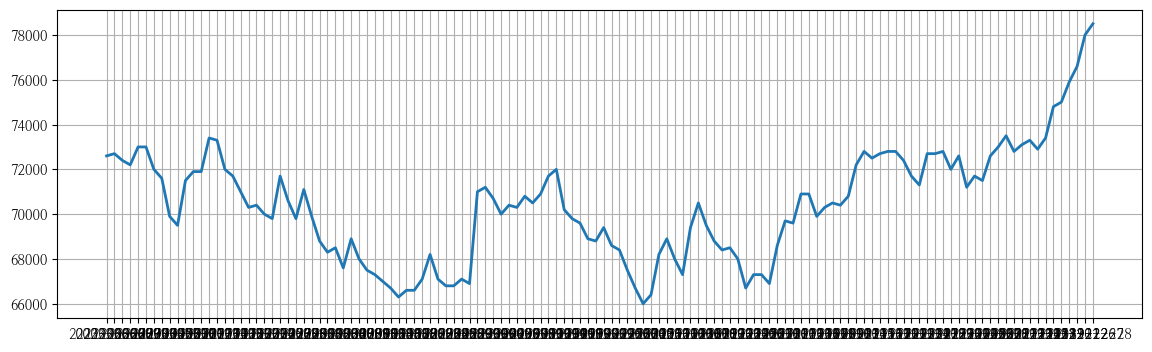

In [29]:
plt.plot(sdf["Date"],sdf["종가"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


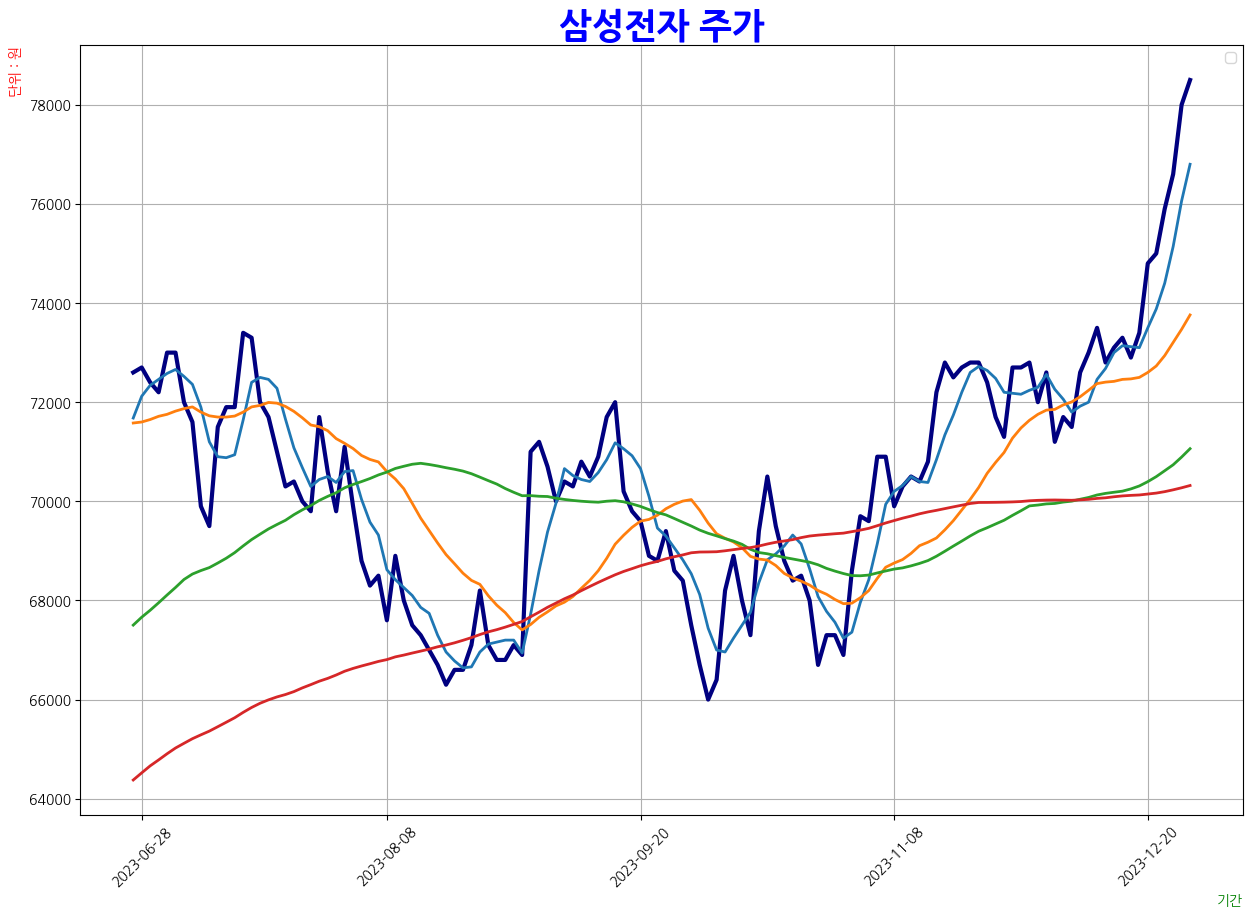

In [30]:
import koreanize_matplotlib

plt.figure(figsize=(15,10))
plt.plot(sdf["Date"],sdf["종가"], color="navy", linewidth = 3)
plt.title("삼성전자 주가", color = "blue", fontsize = 25, fontweight = "bold")
plt.xticks([1,30,60,90,120,150,180,210,240],rotation = 45) # 1일, 30일, 60일, 90일, 120일, 150일, 180일, 210일, 240일에 해당하는 위치에 눈금
plt.xlabel("기간", color= "green" , loc = "right")
plt.ylabel("단위 : 원", color = "red", loc = "top")
plt.plot(sdf["Date"],sdf["5일_이동평균"]) # 5일 평균선 추가
plt.plot(sdf["Date"],sdf["20일_이동평균"]) # 20일 평균선 추가
plt.plot(sdf["Date"],sdf["60일_이동평균"]) # 60일 평균선 추가
plt.plot(sdf["Date"],sdf["120일_이동평균"]) # 120일 평균선 추가
plt.legend(loc = "upper right") # label 추가

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

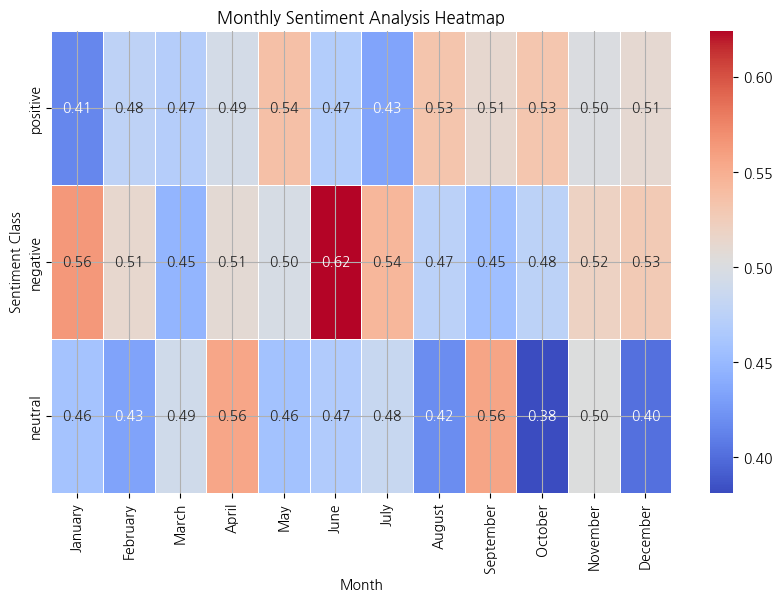

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 가상의 감성분석 결과 데이터 생성 (예시)
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
sentiments = ['positive', 'negative', 'neutral']

# 감성분석 결과를 나타내는 가상의 행렬 생성 (예시)
data = np.random.rand(len(dates), len(sentiments))

# 데이터프레임 생성
df = pd.DataFrame(data, index=dates, columns=sentiments)

# 날짜를 월별로 집계
df['Month'] = df.index.month_name()

# 월별 평균 계산
df_monthly = df.groupby('Month').mean()

# 월 순서 재정렬
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_monthly = df_monthly.reindex(month_order)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(df_monthly.T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Monthly Sentiment Analysis Heatmap')
plt.xlabel('Month')
plt.ylabel('Sentiment Class')
plt.show()

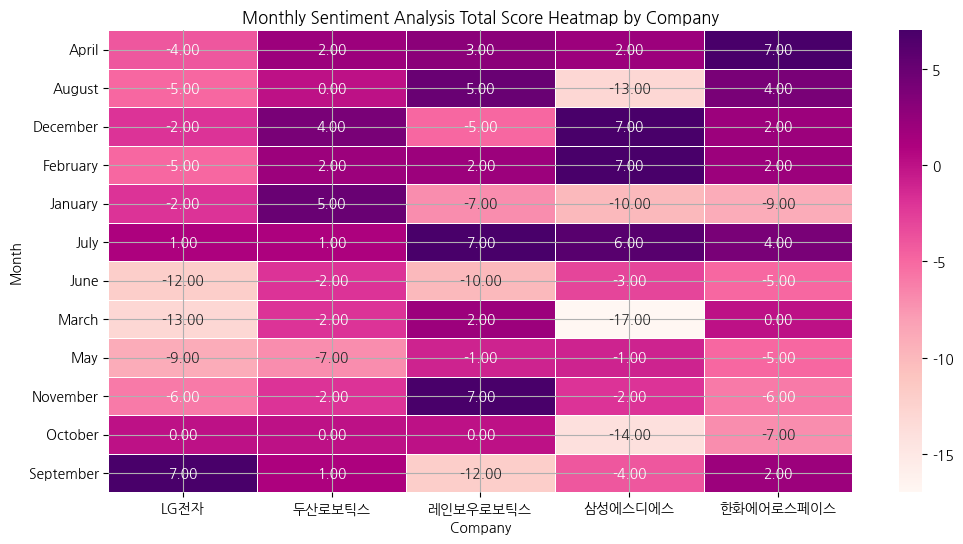

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 가상의 감성분석 결과 데이터 생성
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
companies = ["LG전자", "레인보우로보틱스", "삼성에스디에스", "한화에어로스페이스", "두산로보틱스"]
sentiments = ['positive', 'negative', 'neutral']

# 감성분석 결과를 나타내는 가상의 행렬 생성
data = np.random.choice([-1, 0, 1], size=(len(dates)*len(companies), len(sentiments)))

# 데이터프레임 생성
df = pd.DataFrame(data, index=pd.MultiIndex.from_product([dates, companies], names=['Date', 'Company']), columns=sentiments)

# 감성분석 결과에 가중치를 부여하여 총점으로 변환
weights = {'positive': 1, 'negative': -1, 'neutral': 0}
df['Total'] = df.apply(lambda row: sum(row * [weights[s] for s in sentiments]), axis=1)

# 감성분석 결과의 총점을 월별, 기업별로 합계 계산
df['Month'] = df.index.get_level_values('Date').month_name()
df_monthly_total = df.groupby(['Month', 'Company'])['Total'].sum().unstack()



# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(df_monthly_total, annot=True, fmt='.2f', linewidths=.5, cmap='RdPu')
plt.title('Monthly Sentiment Analysis Total Score Heatmap by Company')
plt.xlabel('Company')
plt.ylabel('Month')
plt.show()


In [34]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')
robot_df = df_krx[df_krx["Name"].isin(companies)]
robot_df

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
19,066570,KR7066570003,LG전자,KOSPI,,91500,2,-300,-0.33,92900,92900,91100,83271,7642120400,14973774981000,163647814,STK
24,018260,KR7018260000,삼성에스디에스,KOSPI,,165400,2,-1200,-0.72,166700,168100,164800,29922,4978605500,12798288120000,77377800,STK
50,012450,KR7012450003,한화에어로스페이스,KOSPI,,144500,2,-100,-0.07,145900,146200,143100,143125,20641983000,7316035000000,50630000,STK
63,454910,KR7454910001,두산로보틱스,KOSPI,,83900,2,-1200,-1.41,86300,86600,82700,426580,35924584300,5438396322000,64819980,STK
99,277810,KR7277810008,레인보우로보틱스,KOSDAQ,기술성장기업부,172500,2,-1100,-0.63,177300,177400,170200,99505,17268345500,3346475505000,19399858,KSQ


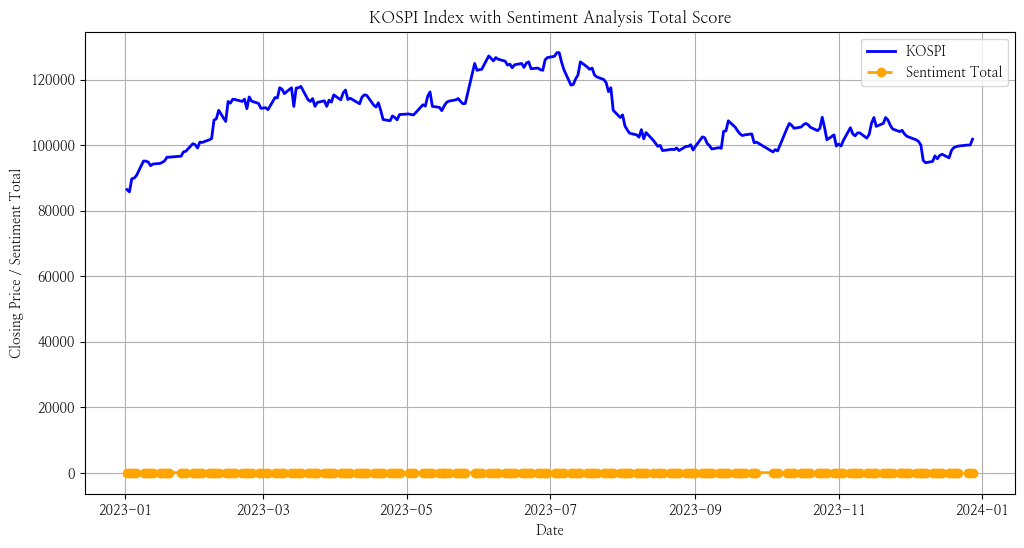

In [35]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# FinanceDataReader를 사용하여 데이터 가져오기
selected_list = ['066570','018260','012450','454910','277810']
selected_stock_data = fdr.DataReader(selected_list, '2023-01-01', '2023-12-31')
lg_stock = fdr.DataReader('066570', '2023-01-01', '2023-12-31')

# 가상의 감성분석 결과 데이터 생성
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')  # 주가 데이터와 일치하는 날짜 범위로 변경
companies = ["LG전자", "레인보우로보틱스", "삼성에스디에스", "한화에어로스페이스", "두산로보틱스"]
sentiments = ['positive', 'negative', 'neutral']

# 감성분석 결과를 나타내는 가상의 행렬 생성
data = np.random.choice([-1, 0, 1], size=(len(dates)*len(companies), len(sentiments)))

# 데이터프레임 생성
df = pd.DataFrame(data, index=pd.MultiIndex.from_product([dates, companies], names=['Date', 'Company']), columns=sentiments)

# 감성분석 결과에 가중치를 부여하여 총점으로 변환
weights = {'positive': 1, 'negative': -1, 'neutral': 0}
df['Total'] = df.apply(lambda row: sum(row * [weights[s] for s in sentiments]), axis=1)

# 감성분석 결과의 총점을 날짜별로 합계 계산
df_daily_total = df.groupby(level='Date')['Total'].sum()

# 주가 데이터에 감성분석 결과 총점을 추가
lg_stock['Sentiment_Total'] = df_daily_total

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(lg_stock['Close'], label='KOSPI', color='blue')
plt.plot(lg_stock['Sentiment_Total'], label='Sentiment Total', linestyle='--', marker='o', color='orange')
plt.title('KOSPI Index with Sentiment Analysis Total Score')
plt.xlabel('Date')
plt.ylabel('Closing Price / Sentiment Total')
plt.legend()
plt.show()


In [36]:
lg_stock

,Open,High,Low,Close,Volume,Change,Sentiment_Total
Date,,,,,,,
2023-01-02,87200,87600,86300,86400,256377,-0.001156,0
2023-01-03,86400,87000,83500,85700,535289,-0.008102,-4
2023-01-04,84900,89700,84500,89700,582484,0.046674,-2
2023-01-05,89700,90500,89000,89900,372671,0.002230,-2
2023-01-06,88700,91600,88700,90700,520258,0.008899,-2
...,...,...,...,...,...,...,...
2023-12-21,98500,100400,98500,99500,543574,0.003024,-2
2023-12-22,100400,100400,99000,99700,319969,0.002010,0
2023-12-26,100600,100600,99200,100000,313537,0.003009,-3


In [37]:
close_mean = lg_stock['Close'].mean()
print(close_mean)

108438.36734693877


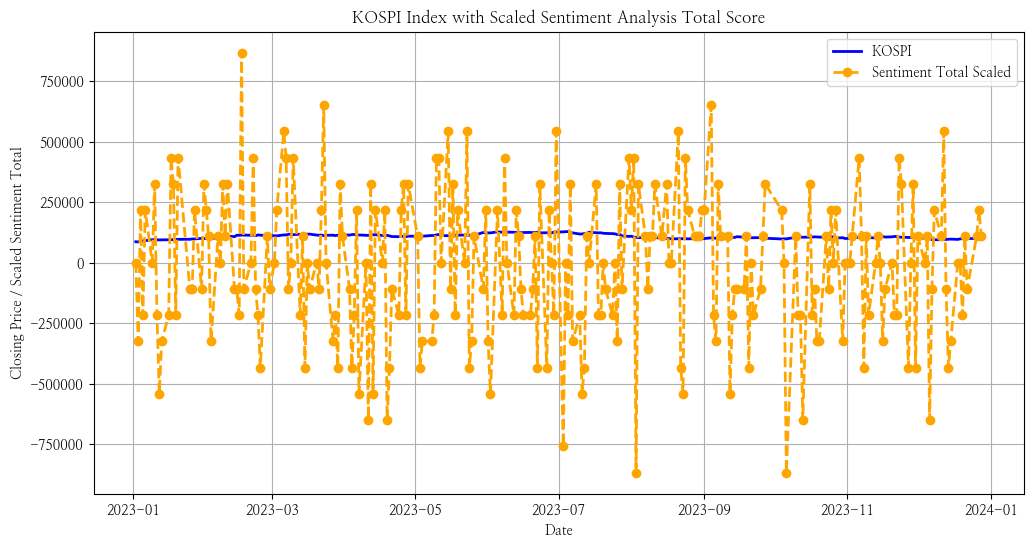

In [38]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# FinanceDataReader를 사용하여 데이터 가져오기
selected_list = ['066570','018260','012450','454910','277810']
selected_stock_data = fdr.DataReader(selected_list, '2023-01-01', '2023-12-31')
lg_stock = fdr.DataReader('066570', '2023-01-01', '2023-12-31')

# 가상의 감성분석 결과 데이터 생성
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')  # 주가 데이터와 일치하는 날짜 범위로 변경
companies = ["LG전자", "레인보우로보틱스", "삼성에스디에스", "한화에어로스페이스", "두산로보틱스"]
sentiments = ['positive', 'negative', 'neutral']

# 감성분석 결과를 나타내는 가상의 행렬 생성
data = np.random.choice([-1, 0, 1], size=(len(dates)*len(companies), len(sentiments)))

# 데이터프레임 생성
df = pd.DataFrame(data, index=pd.MultiIndex.from_product([dates, companies], names=['Date', 'Company']), columns=sentiments)

# 감성분석 결과에 가중치를 부여하여 총점으로 변환
weights = {'positive': 1, 'negative': -1, 'neutral': 0}
df['Total'] = df.apply(lambda row: sum(row * [weights[s] for s in sentiments]), axis=1)

# 감성분석 결과의 총점을 날짜별로 합계 계산
df_daily_total = df.groupby(level='Date')['Total'].sum()

# 주가 데이터에 감성분석 결과 총점을 추가
lg_stock['Sentiment_Total'] = df_daily_total

# 감성분석 결과의 크기를 늘리기
scaling_factor = close_mean
lg_stock['Sentiment_Total_Scaled'] = lg_stock['Sentiment_Total'] * scaling_factor

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(lg_stock['Close'], label='KOSPI', color='blue')
plt.plot(lg_stock['Sentiment_Total_Scaled'], label='Sentiment Total Scaled', linestyle='--', marker='o', color='orange')
plt.title('KOSPI Index with Scaled Sentiment Analysis Total Score')
plt.xlabel('Date')
plt.ylabel('Closing Price / Scaled Sentiment Total')
plt.legend()
plt.show()


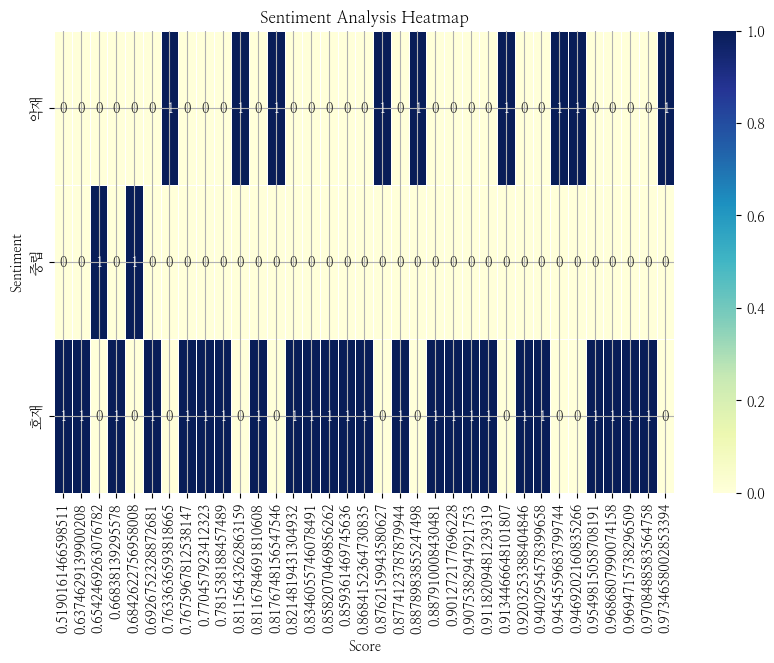

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 감성분석 결과 데이터
sentiment_data = [['중립', 0.6542469263076782], ['호재', 0.9118209481239319], ['호재', 0.66838139295578], ['호재', 0.6374629139900208], ['악재', 0.9134466648101807], ['호재', 0.859361469745636], ['호재', 0.770457923412323], ['호재', 0.8684152364730835], ['호재', 0.6926752328872681], ['호재', 0.8214819431304932], ['악재', 0.7633636593818665], ['호재', 0.9694715738296509], ['호재', 0.9708488583564758], ['호재', 0.5190161466598511], ['호재', 0.8116784691810608], ['호재', 0.781538188457489], ['악재', 0.8878983855247498], ['호재', 0.887910008430481], ['호재', 0.8346055746078491], ['악재', 0.8762159943580627], ['악재', 0.8115643262863159], ['악재', 0.8176748156547546], ['호재', 0.9686807990074158], ['호재', 0.7675967812538147], ['호재', 0.8582070469856262], ['중립', 0.6842622756958008], ['호재', 0.9075382947921753], ['호재', 0.9203253388404846], ['호재', 0.8774123787879944], ['호재', 0.9402954578399658], ['악재', 0.9469202160835266], ['악재', 0.9454559683799744], ['악재', 0.9734658002853394], ['호재', 0.901272177696228], ['호재', 0.9549815058708191]]

# 데이터프레임 생성
df = pd.DataFrame(sentiment_data, columns=['Sentiment', 'Score'])

# 감성별 점수를 행렬로 변환
heatmap_data = df.pivot_table(index='Sentiment', columns='Score', aggfunc=len, fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Sentiment Analysis Heatmap')
plt.xlabel('Score')
plt.ylabel('Sentiment')
plt.show()

In [49]:
import random
import koreanize_matplotlib

# 월 및 기업 정보
months = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
companies = ["LG전자", "레인보우로보틱스", "삼성에스디에스", "한화에어로스페이스", "두산로보틱스"]

# 월별, 기업별 히트맵을 위한 데이터 생성
desired_data_count = len(months) * len(companies)

# 데이터를 임의의 개수로 맞추기
sentiments_data = []

for month in months:
    for company in companies:
        random_sentiment = random.choice(['중립', '호재', '악재'])
        random_score = random.uniform(0, 1)
        sentiments_data.append([month, company, random_sentiment, random_score])

# 데이터 확인
print(sentiments_data)

[['1월', 'LG전자', '중립', 0.13953812300582402], ['1월', '레인보우로보틱스', '호재', 0.456976381392745], ['1월', '삼성에스디에스', '호재', 0.7247609913343314], ['1월', '한화에어로스페이스', '악재', 0.9365453544107679], ['1월', '두산로보틱스', '악재', 0.023562255267018717], ['2월', 'LG전자', '중립', 0.8697915978325954], ['2월', '레인보우로보틱스', '악재', 0.5713187632000996], ['2월', '삼성에스디에스', '호재', 0.9779449902271752], ['2월', '한화에어로스페이스', '악재', 0.2679909744485217], ['2월', '두산로보틱스', '악재', 0.6087591632081264], ['3월', 'LG전자', '악재', 0.29266393156334436], ['3월', '레인보우로보틱스', '악재', 0.14582815480123157], ['3월', '삼성에스디에스', '악재', 0.6988431850070076], ['3월', '한화에어로스페이스', '호재', 0.4232077599319993], ['3월', '두산로보틱스', '호재', 0.6772635706278388], ['4월', 'LG전자', '호재', 0.9755890477907212], ['4월', '레인보우로보틱스', '호재', 0.8899605014567523], ['4월', '삼성에스디에스', '중립', 0.1667852666827867], ['4월', '한화에어로스페이스', '악재', 0.006260687293150102], ['4월', '두산로보틱스', '악재', 0.545634362741329], ['5월', 'LG전자', '중립', 0.44100794324573], ['5월', '레인보우로보틱스', '중립', 0.6889355238233541], ['5월', '삼성에스

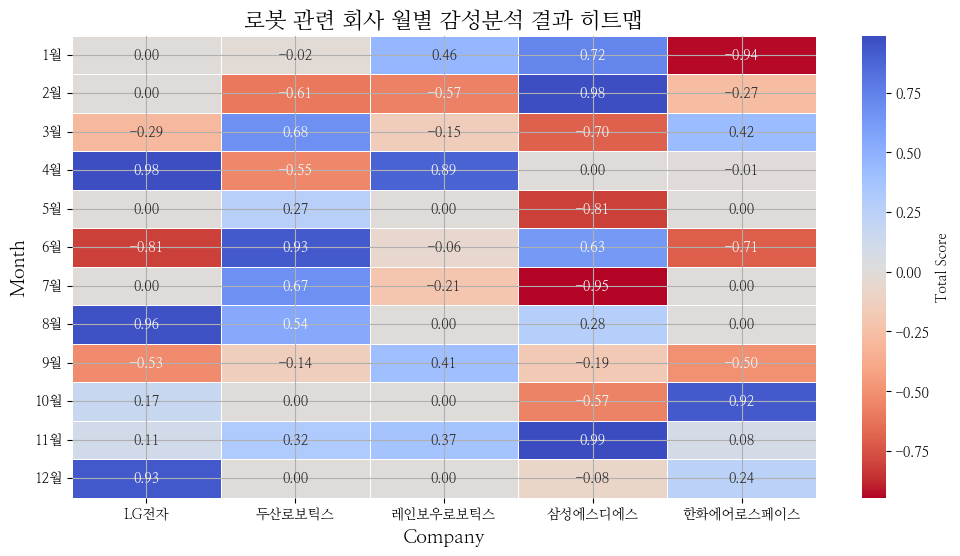

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# 데이터프레임 생성
df = pd.DataFrame(sentiments_data, columns=['Month', 'Company', 'Sentiment', 'Score'])

# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
df['Total'] = df['Sentiment'].map(weights) * df['Score']

# 감성분석 결과의 총점을 월별, 기업별로 합계 계산
df_monthly_total = df.groupby(['Month', 'Company'])['Total'].sum().unstack()

# 월 순서대로 정렬
df_monthly_total = df_monthly_total.reindex(months)

# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(df_monthly_total, cmap='coolwarm_r', annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Total Score'})
plt.title('로봇 관련 회사 월별 감성분석 결과 히트맵', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.yticks(rotation=0)
plt.show()

In [51]:
import random
import koreanize_matplotlib
from datetime import datetime, timedelta

# 기업 정보
companies = ["LG전자", "레인보우로보틱스", "삼성에스디에스", "한화에어로스페이스", "두산로보틱스"]
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# 날짜 범위 생성
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# 일별, 기업별 히트맵을 위한 데이터 생성
sentiments_data = []

for date in date_range:
    for company in companies:
        random_sentiment = random.choice(['중립', '호재', '악재'])
        random_score = random.uniform(0, 1)
        sentiments_data.append([date.strftime('%Y-%m-%d'), company, random_sentiment, random_score])

# 데이터 확인
print(sentiments_data)

[['2023-01-01', 'LG전자', '중립', 0.6630196225878202], ['2023-01-01', '레인보우로보틱스', '중립', 0.10668151598008824], ['2023-01-01', '삼성에스디에스', '악재', 0.5057223743705257], ['2023-01-01', '한화에어로스페이스', '호재', 0.6393645675781863], ['2023-01-01', '두산로보틱스', '중립', 0.42259910160464553], ['2023-01-02', 'LG전자', '악재', 0.6020964247979447], ['2023-01-02', '레인보우로보틱스', '호재', 0.5776691267134623], ['2023-01-02', '삼성에스디에스', '호재', 0.34602658448759827], ['2023-01-02', '한화에어로스페이스', '호재', 0.9100540245495804], ['2023-01-02', '두산로보틱스', '호재', 0.8224076030363318], ['2023-01-03', 'LG전자', '호재', 0.8122052763321802], ['2023-01-03', '레인보우로보틱스', '호재', 0.7655057259032744], ['2023-01-03', '삼성에스디에스', '호재', 0.9055686387701557], ['2023-01-03', '한화에어로스페이스', '중립', 0.7407670910135868], ['2023-01-03', '두산로보틱스', '호재', 0.360172278368062], ['2023-01-04', 'LG전자', '악재', 0.8189043902101106], ['2023-01-04', '레인보우로보틱스', '호재', 0.24565555278355466], ['2023-01-04', '삼성에스디에스', '악재', 0.9505953881308262], ['2023-01-04', '한화에어로스페이스', '악재', 0.36108466102

In [52]:
# 데이터프레임 생성
df = pd.DataFrame(sentiments_data, columns=['Date', 'Company', 'Sentiment', 'Score'])

# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
df['Total'] = df['Sentiment'].map(weights) * df['Score']

df

,Date,Company,Sentiment,Score,Total
0,2023-01-01,LG전자,중립,0.663020,0.000000
1,2023-01-01,레인보우로보틱스,중립,0.106682,0.000000
2,2023-01-01,삼성에스디에스,악재,0.505722,-0.505722
3,2023-01-01,한화에어로스페이스,호재,0.639365,0.639365
4,2023-01-01,두산로보틱스,중립,0.422599,0.000000
...,...,...,...,...,...
1820,2023-12-31,LG전자,호재,0.237506,0.237506
1821,2023-12-31,레인보우로보틱스,악재,0.990561,-0.990561
1822,2023-12-31,삼성에스디에스,중립,0.473531,0.000000
1823,2023-12-31,한화에어로스페이스,중립,0.022940,0.000000


In [53]:
# LG전자만 남기기
df_lg = df[df['Company'] == 'LG전자'].copy()

# 'Date' 열을 datetime 타입으로 변환
df_lg['Date'] = pd.to_datetime(df_lg['Date'])

# 'Date' 레벨을 주식 데이터의 인덱스로 설정
df_lg = df_lg.set_index('Date')

df_lg

,Company,Sentiment,Score,Total
Date,,,,
2023-01-01,LG전자,중립,0.663020,0.000000
2023-01-02,LG전자,악재,0.602096,-0.602096
2023-01-03,LG전자,호재,0.812205,0.812205
2023-01-04,LG전자,악재,0.818904,-0.818904
2023-01-05,LG전자,악재,0.294153,-0.294153
...,...,...,...,...
2023-12-27,LG전자,중립,0.182763,0.000000
2023-12-28,LG전자,호재,0.643915,0.643915
2023-12-29,LG전자,악재,0.268273,-0.268273


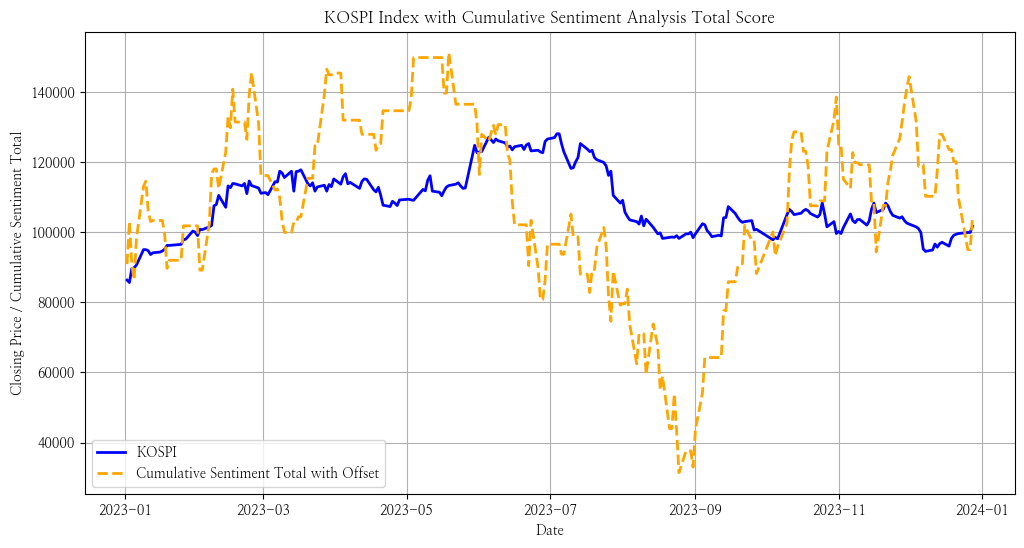

In [96]:
import FinanceDataReader as fdr

# 주가 데이터 가져오기
lg_stock = fdr.DataReader('066570', '2023-01-01', '2023-12-31')

# 주가 데이터에 감성분석 결과 총점을 추가
lg_stock['Sentiment_Total'] = df_lg['Total']

# 감성분석 결과의 크기를 늘리기
scaling_factor = 15000
lg_stock['Sentiment_Total'] = lg_stock['Sentiment_Total'] * scaling_factor

# 누적 합 계산
lg_stock['Sentiment_Total_Cumulative'] = lg_stock['Sentiment_Total'].cumsum()

# 오프셋 설정
offset = 100000
lg_stock['Sentiment_Total_Cumulative_Offset'] = lg_stock['Sentiment_Total_Cumulative'] + offset

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(lg_stock['Close'], label='KOSPI', color='blue')
plt.plot(lg_stock['Sentiment_Total_Cumulative_Offset'], label='Cumulative Sentiment Total with Offset', linestyle='--', color='orange')
plt.title('KOSPI Index with Cumulative Sentiment Analysis Total Score')
plt.xlabel('Date')
plt.ylabel('Closing Price / Cumulative Sentiment Total')
plt.legend()
plt.show()


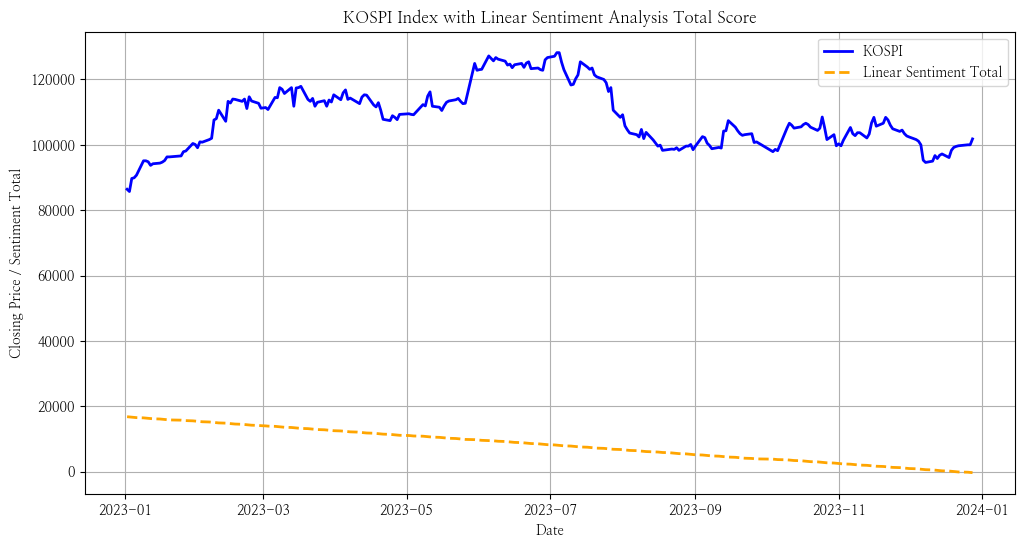

In [55]:
import FinanceDataReader as fdr

# 주가 데이터 가져오기
lg_stock = fdr.DataReader('066570', '2023-01-01', '2023-12-31')

# 감성분석 결과의 크기를 조절
scaling_factor = 15000
lg_stock['Sentiment_Total'] = df_lg['Total'] * scaling_factor

# 누적 합 계산
lg_stock['Sentiment_Total_Cumulative'] = lg_stock['Sentiment_Total'].cumsum()

# 감성분석 결과 총점을 기반으로한 1차 함수의 계수 계산
coeff = np.polyfit(np.arange(len(lg_stock)), lg_stock['Sentiment_Total_Cumulative'], 1)

# 1차 함수의 y값 계산하여 추가
lg_stock['Sentiment_Linear'] = np.polyval(coeff, np.arange(len(lg_stock)))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(lg_stock['Close'], label='KOSPI', color='blue')
plt.plot(lg_stock['Sentiment_Linear'], label='Linear Sentiment Total', linestyle='--', color='orange')
plt.title('KOSPI Index with Linear Sentiment Analysis Total Score')
plt.xlabel('Date')
plt.ylabel('Closing Price / Sentiment Total')
plt.legend()
plt.show()

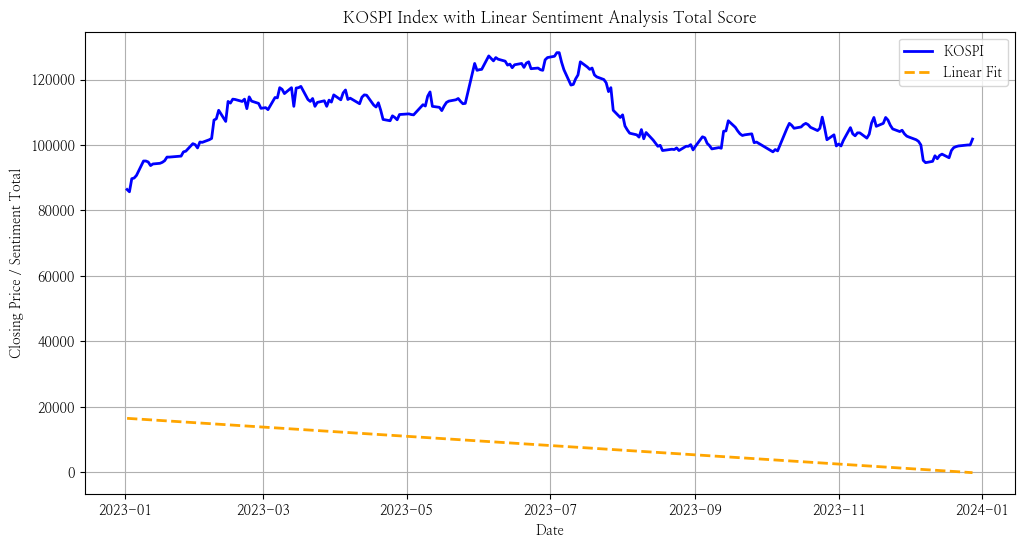

In [56]:
import FinanceDataReader as fdr
import seaborn as sns
import matplotlib.pyplot as plt

# 주가 데이터 가져오기
lg_stock = fdr.DataReader('066570', '2023-01-01', '2023-12-31')

# 감성분석 결과의 크기를 조절
scaling_factor = 15000
lg_stock['Sentiment_Total'] = df_lg['Total'] * scaling_factor

# 누적 합 계산
lg_stock['Sentiment_Total_Cumulative'] = lg_stock['Sentiment_Total'].cumsum()

# 날짜를 일로 나타내는 정수로 변환
lg_stock['Date_Integer'] = (lg_stock.index - lg_stock.index.min()).days

# 감성분석 결과를 기반으로한 1차 함수의 계수 계산
coeff = np.polyfit(lg_stock['Date_Integer'], lg_stock['Sentiment_Total_Cumulative'], 1)

# 1차 함수의 y값 계산하여 추가
lg_stock['Sentiment_Linear'] = np.polyval(coeff, lg_stock['Date_Integer'])

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(lg_stock['Close'], label='KOSPI', color='blue')
plt.plot(lg_stock['Sentiment_Linear'], label='Linear Fit', linestyle='--', color='orange')
plt.title('KOSPI Index with Linear Sentiment Analysis Total Score')
plt.xlabel('Date')
plt.ylabel('Closing Price / Sentiment Total')
plt.legend()
plt.show()


In [57]:
lg_stock

,Open,High,Low,Close,Volume,Change,Sentiment_Total,Sentiment_Total_Cumulative,Date_Integer,Sentiment_Linear
Date,,,,,,,,,,
2023-01-02,87200,87600,86300,86400,256377,-0.001156,-9031.446372,-9031.446372,0,16496.639987
2023-01-03,86400,87000,83500,85700,535289,-0.008102,12183.079145,3151.632773,1,16450.541069
2023-01-04,84900,89700,84500,89700,582484,0.046674,-12283.565853,-9131.933080,2,16404.442150
2023-01-05,89700,90500,89000,89900,372671,0.002230,-4412.295632,-13544.228713,3,16358.343231
2023-01-06,88700,91600,88700,90700,520258,0.008899,11964.552862,-1579.675851,4,16312.244313
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,98500,100400,98500,99500,543574,0.003024,0.000000,20223.294861,353,223.721704
2023-12-22,100400,100400,99000,99700,319969,0.002010,-10323.711606,9899.583255,354,177.622786
2023-12-26,100600,100600,99200,100000,313537,0.003009,-14817.263973,-4917.680718,358,-6.772889


In [60]:
close_mean = lg_stock['Close'].mean()
print(close_mean)

108438.36734693877


In [61]:
target_date = pd.to_datetime('2023-07-02')
index_of_target_date = lg_stock.index.get_loc(target_date)

print(f"The index of {target_date} is: {index_of_target_date}")

KeyError: Timestamp('2023-07-02 00:00:00')

In [62]:
middle_index = len(lg_stock) // 2
middle_date = lg_stock.index[middle_index]
print(f"The middle index is: {middle_index}, and the date at the middle index is: {middle_date}")


The middle index is: 122, and the date at the middle index is: 2023-06-30 00:00:00


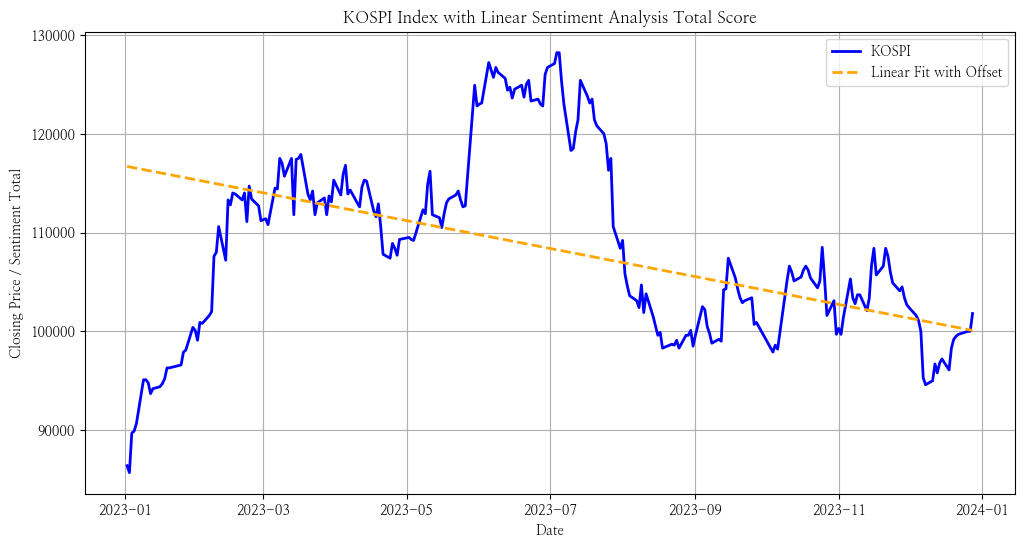

In [63]:
import FinanceDataReader as fdr
import seaborn as sns
import matplotlib.pyplot as plt

# 주가 데이터 가져오기
lg_stock = fdr.DataReader('066570', '2023-01-01', '2023-12-31')

# 감성분석 결과의 크기를 조절
scaling_factor = 15000
lg_stock['Sentiment_Total'] = df_lg['Total'] * scaling_factor

# 누적 합 계산
lg_stock['Sentiment_Total_Cumulative'] = lg_stock['Sentiment_Total'].cumsum()

# 날짜를 일로 나타내는 정수로 변환
lg_stock['Date_Integer'] = (lg_stock.index - lg_stock.index.min()).days

# 감성분석 결과를 기반으로한 1차 함수의 계수 계산
coeff = np.polyfit(lg_stock['Date_Integer'], lg_stock['Sentiment_Total_Cumulative'], 1)

# 1차 함수의 y값 계산하여 추가
lg_stock['Sentiment_Linear'] = np.polyval(coeff, lg_stock['Date_Integer'])

# 오프셋 설정
offset = 108438 - lg_stock['Sentiment_Linear'].iloc[122]  # 122번째 값에 대한 오프셋 계산(108438:close_mean, 122:middle_index)
lg_stock['Sentiment_Linear_Offset'] = lg_stock['Sentiment_Linear'] + offset

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(lg_stock['Close'], label='KOSPI', color='blue')
plt.plot(lg_stock['Sentiment_Linear_Offset'], label='Linear Fit with Offset', linestyle='--', color='orange')
plt.title('KOSPI Index with Linear Sentiment Analysis Total Score')
plt.xlabel('Date')
plt.ylabel('Closing Price / Sentiment Total')
plt.legend()
plt.show()


# 상관성 분석

In [64]:
lg_stock

,Open,High,Low,Close,Volume,Change,Sentiment_Total,Sentiment_Total_Cumulative,Date_Integer,Sentiment_Linear,Sentiment_Linear_Offset
Date,,,,,,,,,,,
2023-01-02,87200,87600,86300,86400,256377,-0.001156,-9031.446372,-9031.446372,0,16496.639987,116689.706438
2023-01-03,86400,87000,83500,85700,535289,-0.008102,12183.079145,3151.632773,1,16450.541069,116643.607519
2023-01-04,84900,89700,84500,89700,582484,0.046674,-12283.565853,-9131.933080,2,16404.442150,116597.508601
2023-01-05,89700,90500,89000,89900,372671,0.002230,-4412.295632,-13544.228713,3,16358.343231,116551.409682
2023-01-06,88700,91600,88700,90700,520258,0.008899,11964.552862,-1579.675851,4,16312.244313,116505.310763
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,98500,100400,98500,99500,543574,0.003024,0.000000,20223.294861,353,223.721704,100416.788155
2023-12-22,100400,100400,99000,99700,319969,0.002010,-10323.711606,9899.583255,354,177.622786,100370.689237
2023-12-26,100600,100600,99200,100000,313537,0.003009,-14817.263973,-4917.680718,358,-6.772889,100186.293562


In [65]:
# DatetimeIndex로 설정
lg_stock.index = pd.to_datetime(lg_stock.index)

# 월별 평균 수익률 계산
monthly_avg_returns = lg_stock['Close'].resample('M').mean().pct_change()

# 결과 출력
print(monthly_avg_returns)

Date
2023-01-31         NaN
2023-02-28    0.157482
2023-03-31    0.048567
2023-04-30   -0.020095
2023-05-31    0.012265
2023-06-30    0.098950
2023-07-31   -0.030164
2023-08-31   -0.162142
2023-09-30    0.008373
2023-10-31    0.017254
2023-11-30    0.003385
2023-12-31   -0.055852
Freq: M, Name: Close, dtype: float64


In [66]:
# 'Total' 열을 월별로 평균 계산
monthly_avg_total = df_lg['Total'].resample('M').mean()

# 결과 출력
print(monthly_avg_total)

Date
2023-01-31   -0.104244
2023-02-28    0.028751
2023-03-31    0.056667
2023-04-30   -0.074366
2023-05-31   -0.026199
2023-06-30   -0.131164
2023-07-31   -0.132662
2023-08-31   -0.044963
2023-09-30    0.101340
2023-10-31    0.040935
2023-11-30   -0.004802
2023-12-31   -0.043515
Freq: M, Name: Total, dtype: float64


In [67]:
sentiment_avg_score = monthly_avg_total.tolist()
month_avg_gain = monthly_avg_returns.tolist()

In [68]:
if pd.isna(month_avg_gain[0]):
    month_avg_gain = month_avg_gain[1:]
    sentiment_avg_score = sentiment_avg_score[1:]

In [69]:
import numpy as np
import scipy.stats

# 두 리스트 간의 상관 계수 계산
correlation_coefficient, p_value = scipy.stats.pearsonr(sentiment_avg_score, month_avg_gain)

# 결과 출력
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# 상관 계수와 p-value에 대한 해석
if p_value < 0.05:
    print("Statistically significant correlation.")
else:
    print("No statistically significant correlation.")


Correlation Coefficient: 0.2006819567979506
P-value: 0.5540697792168413
No statistically significant correlation.


In [70]:
import pandas as pd

# 결과를 DataFrame으로 변환
correlation_df = pd.DataFrame({'Returns': month_avg_gain, 'Total_Score': sentiment_avg_score})

# 상관 행렬 계산
correlation_matrix = correlation_df.corr()

# 결과 출력
print(correlation_matrix)

              Returns  Total_Score
Returns      1.000000     0.200682
Total_Score  0.200682     1.000000


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# 두 리스트 합치기
correlation_data = pd.DataFrame({'월별 평균 수익률 변동': month_avg_gain, '월별 평균 감성분석 총점': sentiment_avg_score})

# 2월부터 12월까지의 인덱스 생성
index_months = [str(i) + '월' for i in range(2, 13)]

# 데이터프레임에 인덱스 설정
correlation_data.index = index_months

correlation_data

,월별 평균 수익률 변동,월별 평균 감성분석 총점
2월,0.157482,0.028751
3월,0.048567,0.056667
4월,-0.020095,-0.074366
5월,0.012265,-0.026199
6월,0.098950,-0.131164
7월,-0.030164,-0.132662
8월,-0.162142,-0.044963
9월,0.008373,0.101340
10월,0.017254,0.040935
11월,0.003385,-0.004802


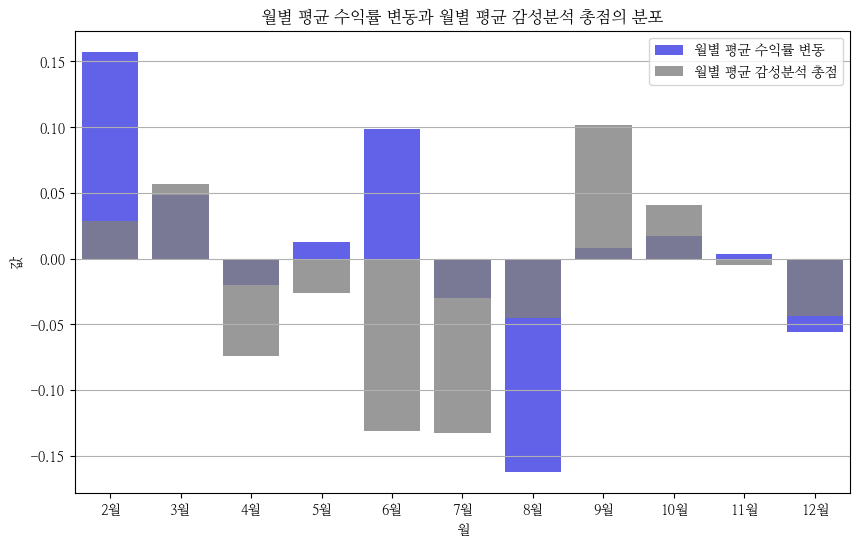

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# 두 리스트 합치기
correlation_data = pd.DataFrame({'월별 평균 수익률 변동': month_avg_gain, '월별 평균 감성분석 총점': sentiment_avg_score})

# 2월부터 12월까지의 인덱스 생성
index_months = [str(i) + '월' for i in range(2, 13)]

# 데이터프레임에 인덱스 설정
correlation_data.index = index_months

# 히스토그램 그리기
plt.figure(figsize=(10, 6))

# 각 월에 대한 수치값을 세로로 히스토그램으로 그리기
sns.barplot(x=index_months, y='월별 평균 수익률 변동', data=correlation_data, alpha=0.7, label='월별 평균 수익률 변동', color='Blue')
sns.barplot(x=index_months, y='월별 평균 감성분석 총점', data=correlation_data, alpha=0.8, label='월별 평균 감성분석 총점', color = 'Gray')

plt.title('월별 평균 수익률 변동과 월별 평균 감성분석 총점의 분포')
plt.xlabel('월')
plt.ylabel('값')
plt.legend()
plt.show()
